Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

import utilities as utils

Loads the datacube

In [2]:
data = utils.load_dataset()
data.head()

,"ï»¿""H3_Address""",H3_Resolution,H3_Geometry,Longitude_EPSG4326,Latitude_EPSG4326,Continent_Majority,Continent_Minority,Country_Majority,Country_Minority,Province_Majority,...,Litmod_Density_Asthenosphere,Litmod_Density_Crust,Litmod_Density_Lithosphere,Crust1_Type,Crust1_CrustalThickness,Crust1_SedimentThickness,Training_MVT_Deposit,Training_MVT_Occurrence,Training_CD_Deposit,Training_CD_Occurrence
0,8712e579bffffff,7,"POLYGON ((-115.0314 54.5077, -115.0393 54.4961...",-115.018142,54.497221,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260254,3337.300049,island arc,-38.450497,2991.459961,Absent,Absent,Absent,Absent
1,8712e579affffff,7,"POLYGON ((-115.0658 54.51706, -115.0737 54.505...",-115.052542,54.506590,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300293,island arc,-38.430000,3000.000244,Absent,Absent,Absent,Absent
2,8712e56b4ffffff,7,"POLYGON ((-115.0604 54.49501, -115.0682 54.483...",-115.047107,54.484541,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.259766,3337.300049,island arc,-38.430000,3000.000000,Absent,Absent,Absent,Absent
3,8712e56b5ffffff,7,"POLYGON ((-115.026 54.48564, -115.0338 54.4740...",-115.012729,54.475169,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300049,island arc,-38.591599,2932.666504,Absent,Absent,Absent,Absent
4,8712e56a6ffffff,7,"POLYGON ((-114.997 54.49832, -115.0049 54.4867...",-114.983753,54.487840,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300049,island arc,-39.815273,2422.801758,Absent,Absent,Absent,Absent


In [3]:
# modifies presence / absence columns to boolean - geology properties
data["Geology_Dictionary_Alkalic"] = data["Geology_Dictionary_Alkalic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Anatectic"] = data["Geology_Dictionary_Anatectic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Calcareous"] = data["Geology_Dictionary_Calcareous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Carbonaceous"] = data["Geology_Dictionary_Carbonaceous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Cherty"] = data["Geology_Dictionary_Cherty"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_CoarseClastic"] = data["Geology_Dictionary_CoarseClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Evaporitic"] = data["Geology_Dictionary_Evaporitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Felsic"] = data["Geology_Dictionary_Felsic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_FineClastic"] = data["Geology_Dictionary_FineClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Gneissose"] = data["Geology_Dictionary_Gneissose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Igneous"] = data["Geology_Dictionary_Igneous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Intermediate"] = data["Geology_Dictionary_Intermediate"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Pegmatitic"] = data["Geology_Dictionary_Pegmatitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_RedBed"] = data["Geology_Dictionary_RedBed"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Schistose"] = data["Geology_Dictionary_Schistose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Sedimentary"] = data["Geology_Dictionary_Sedimentary"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_UltramaficMafic"] = data["Geology_Dictionary_UltramaficMafic"].apply(lambda x: True if x == "Present" else False)
# modifies presence / absence columns to boolean - labels
data["Training_MVT_Deposit"] = data["Training_MVT_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_MVT_Occurrence"] = data["Training_MVT_Occurrence"].apply(lambda x: True if x == "Present" else False)
data["Training_CD_Deposit"] = data["Training_CD_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_CD_Occurrence"] = data["Training_CD_Occurrence"].apply(lambda x: True if x == "Present" else False)

Selects the data /labels used for MVT WOE baseline

In [4]:
cols_dict = utils.load_features_dict(type='MVT', baseline='preferred')
data_filtered, cols = utils.extract_cols(data, cols_dict)

# converts the categorical variables to one-hot encoded vectors for ML compatibility
data_filtered = pd.get_dummies(data_filtered, columns=['Geology_Lithology_Majority','Geology_Lithology_Minority','Geology_Period_Maximum_Majority','Geology_Period_Minimum_Majority'], prefix=['Geology_Lithology_Majority','Geology_Lithology_Minority','Geology_Period_Maximum_Majority','Geology_Period_Minimum_Majority'])

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164970 entries, 0 to 5164969
Data columns (total 75 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   H3_Geometry                                               object 
 1   Sedimentary_Dictionary                                    bool   
 2   Igneous_Dictionary                                        bool   
 3   Metamorphic_Dictionary                                    bool   
 4   Seismic_LAB_Priestley                                     float64
 5   Seismic_Moho                                              float64
 6   Gravity_GOCE_ShapeIndex                                   float64
 7   Geology_Paleolatitude_Period_Minimum                      float64
 8   Terrane_Proximity                                         float64
 9   Geology_PassiveMargin_Proximity                           float64
 10  Geology_BlackShale_Proximity  

The following function finds all the neighbors and creates a new column "MVT_Deposit".
Original paper treats neighbors of polygons with "Training_MVT_Deposit=Present" and "Training_MVT_Occurrence=Present" as mineral present, "MVT_Deposit=Present" (note: now Deposit means - Deposit, Occurrence, or their neighbor). 

In [5]:
data_filtered = utils.neighbor_deposits(data_filtered, type='MVT')

In [6]:
print(data_filtered['MVT_Deposit'].value_counts())
print(data_filtered['MVT_Deposit_wNeighbors'].value_counts())

MVT_Deposit
False    5162943
True        2027
Name: count, dtype: int64
MVT_Deposit_wNeighbors
False    5155482
True        9488
Name: count, dtype: int64


In [7]:
labels_filtered = data_filtered['MVT_Deposit_wNeighbors']
data_filtered = data_filtered.drop(columns=['H3_Geometry', 'Training_MVT_Deposit', 'Training_MVT_Occurrence', 'MVT_Deposit', 'MVT_Deposit_wNeighbors'])
cols = cols[1:-2]

Clearly the dataset has MANY outliers, as reported in the paper

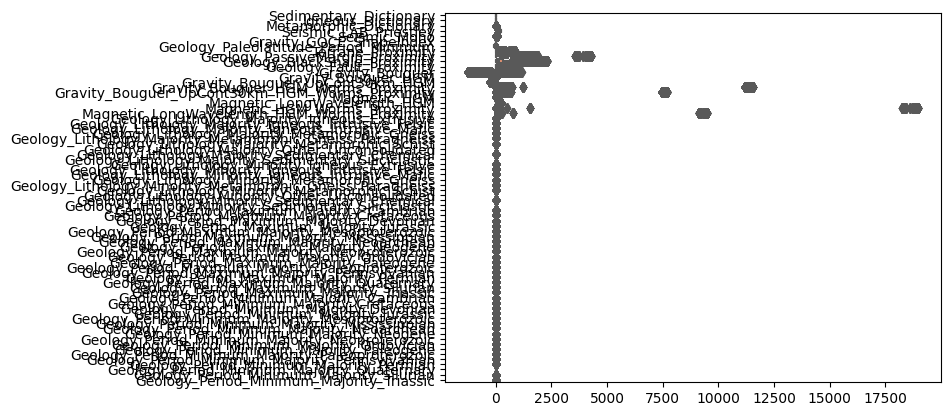

In [8]:
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

We can remove these outliers

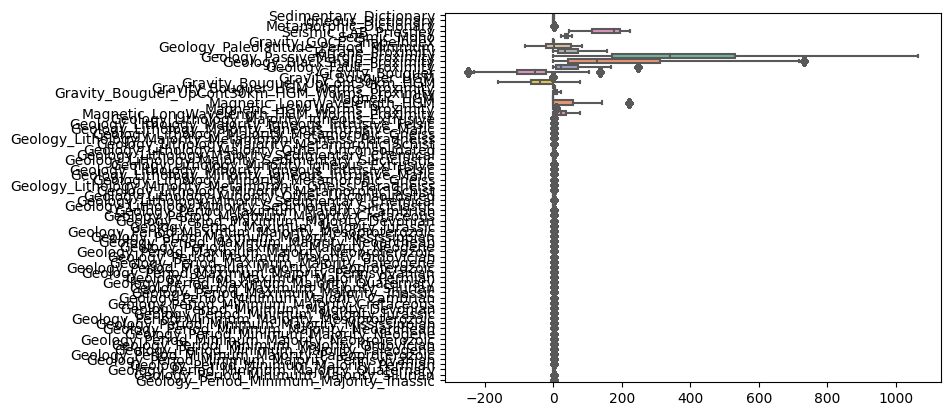

In [9]:
data_filtered = utils.tukey_remove_outliers(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [10]:
print(data_filtered.isna().sum())

Sedimentary_Dictionary                              0
Igneous_Dictionary                                  0
Metamorphic_Dictionary                              0
Seismic_LAB_Priestley                               0
Seismic_Moho                                     1307
                                                 ... 
Geology_Period_Minimum_Majority_Pennsylvanian       0
Geology_Period_Minimum_Majority_Permian             0
Geology_Period_Minimum_Majority_Quaternary          0
Geology_Period_Minimum_Majority_Silurian            0
Geology_Period_Minimum_Majority_Triassic            0
Length: 72, dtype: int64


In [11]:
data_filtered = utils.impute_nans(data_filtered)
print(data_filtered.isna().sum())

Sedimentary_Dictionary                           0
Igneous_Dictionary                               0
Metamorphic_Dictionary                           0
Seismic_LAB_Priestley                            0
Seismic_Moho                                     0
                                                ..
Geology_Period_Minimum_Majority_Pennsylvanian    0
Geology_Period_Minimum_Majority_Permian          0
Geology_Period_Minimum_Majority_Quaternary       0
Geology_Period_Minimum_Majority_Silurian         0
Geology_Period_Minimum_Majority_Triassic         0
Length: 72, dtype: int64


Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


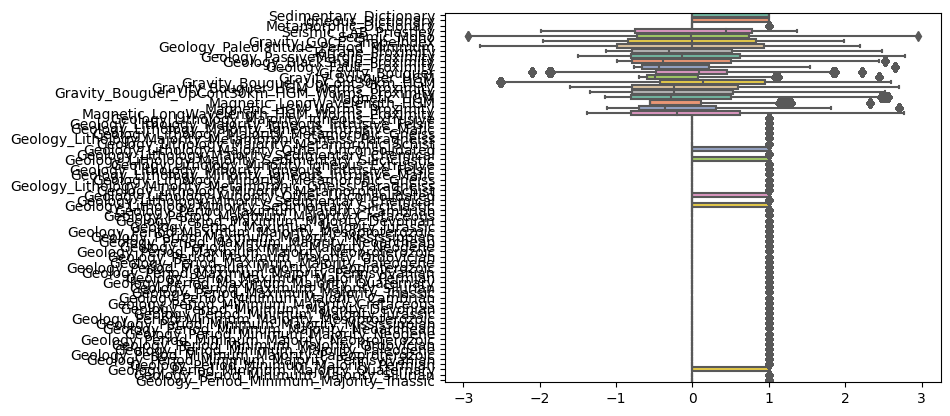

In [12]:
data_filtered = utils.normalize_df(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

Forms the train / test splits

In [13]:
data_filtered["target"] = labels_filtered
data_filtered["Latitude_EPSG4326"] = data["Latitude_EPSG4326"]
data_filtered["Training_MVT_Deposit"] = data["Training_MVT_Deposit"]
te_df, tr_df, _ = utils.get_spatial_cross_val_idx(data_filtered, test_set=4)
tr_df = tr_df.drop(columns=["Training_MVT_Deposit"])
te_df = te_df.drop(columns=["Training_MVT_Deposit"])

# test_set = 1 closest split counts in paper
print(f"Train counts: {tr_df['target'].value_counts()}")
print(f"Test counts: {te_df['target'].value_counts()}")

Train counts: target
False    4088385
True        7907
Name: count, dtype: int64
Test counts: target
False    1067097
True        1581
Name: count, dtype: int64


In [14]:
hist_gbm_classifier = HistGradientBoostingClassifier(
    learning_rate=0.3,
    max_iter=70,              # Number of boosting iterations (equivalent to n_estimators)
    max_depth=6,              # Maximum tree depth
    min_samples_leaf=48,      # Minimum samples required for a leaf node
    max_leaf_nodes=64,        # Maximum number of leaf nodes
    verbose=1                 # Show progress bars
)

In [15]:
gain = 500
hist_gbm_classifier.fit(tr_df.drop(columns=['target','Latitude_EPSG4326','group']), tr_df['target'], sample_weight=gain*tr_df['target'].astype('int')+1)

Binning 2.124 GB of training data: 1.968 s
Binning 0.236 GB of validation data: 0.114 s
Fitting gradient boosted rounds:
[1/70] 1 tree, 62 leaves, max depth = 6, train loss: 0.52872, val loss: 0.53246, in 0.274s
[2/70] 1 tree, 63 leaves, max depth = 6, train loss: 0.43384, val loss: 0.43977, in 0.259s
[3/70] 1 tree, 64 leaves, max depth = 6, train loss: 0.37221, val loss: 0.38151, in 0.250s
[4/70] 1 tree, 63 leaves, max depth = 6, train loss: 0.32734, val loss: 0.33779, in 0.264s
[5/70] 1 tree, 64 leaves, max depth = 6, train loss: 0.29561, val loss: 0.30747, in 0.238s
[6/70] 1 tree, 64 leaves, max depth = 6, train loss: 0.26217, val loss: 0.27541, in 0.246s
[7/70] 1 tree, 64 leaves, max depth = 6, train loss: 0.23934, val loss: 0.25386, in 0.265s
[8/70] 1 tree, 63 leaves, max depth = 6, train loss: 0.22085, val loss: 0.23671, in 0.241s
[9/70] 1 tree, 63 leaves, max depth = 6, train loss: 0.20913, val loss: 0.22516, in 0.214s
[10/70] 1 tree, 63 leaves, max depth = 6, train loss: 0.1976

HistGradientBoostingClassifier(learning_rate=0.3, max_depth=6, max_iter=70,
                               max_leaf_nodes=64, min_samples_leaf=48,
                               verbose=1)

In [16]:
y_pred = hist_gbm_classifier.predict(tr_df.drop(columns=['target','Latitude_EPSG4326','group']))
auc_score = roc_auc_score(tr_df["target"], y_pred)
print(f"Train AUC score:{auc_score}")

y_pred = hist_gbm_classifier.predict(te_df.drop(columns=['target','Latitude_EPSG4326','group']))
auc_score = roc_auc_score(te_df['target'], y_pred)
print(f"Test AUC score:{auc_score}")

all_df = pd.concat([tr_df, te_df])
y_pred = hist_gbm_classifier.predict(all_df.drop(columns=['target','Latitude_EPSG4326','group']))
auc_score = roc_auc_score(all_df["target"], y_pred)
print(f"All AUC score:{auc_score}")

Train AUC score:0.9879590161509033
Test AUC score:0.9802232962042602
All AUC score:0.9867330528411613
